## Introduction :- 
+ In this problem before applying the random forest algorithm we need to take care imbalance in the data which was taken care of by using over sampling later random forest algoritm was applied as usual.
## Objective :- 
+ Use Random Forest to prepare a model on fraud data 
+ treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_data = pd.read_csv("Fraud_check.csv")
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [3]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

## Classification of 'Taxable.Income' feature into less than more than 30000

In [6]:
fraud_data['Taxable.Income'] = pd.cut(fraud_data['Taxable.Income'],bins=[0,30000,99619],labels=['Risky','Good'])
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES


In [7]:
fraud_data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

## There is High imbalance in the Data which will result in poor performance of the model so over sampling for data with 'Risky' Labels will be applied later

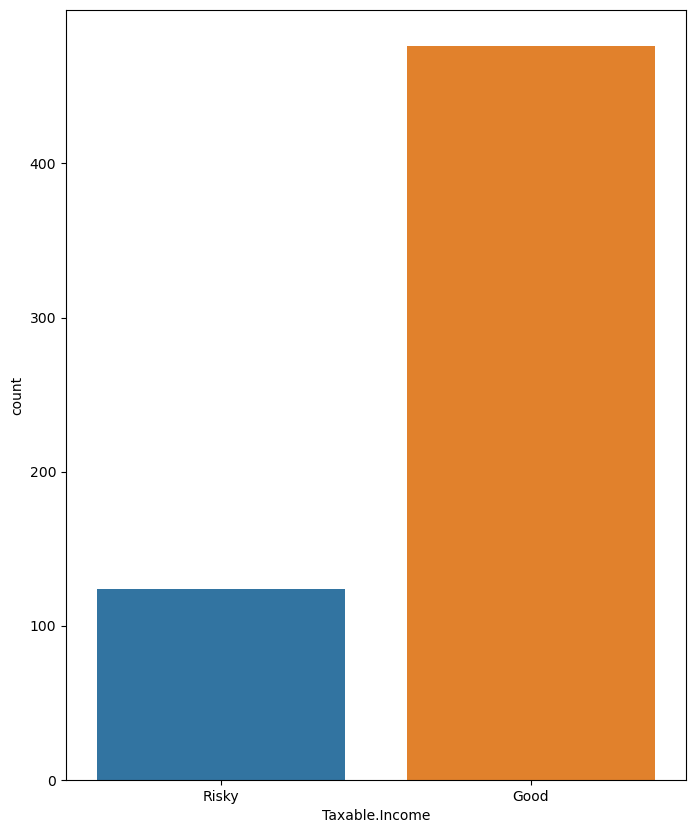

In [8]:
plt.figure(figsize=(8,10))
sns.countplot(x=fraud_data['Taxable.Income'])
plt.show()

In [9]:
pd.get_dummies(fraud_data['Taxable.Income'],drop_first=True)

,Good
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [10]:
fraud_data['Taxable.Income'] = pd.get_dummies(fraud_data['Taxable.Income'],drop_first=True)

In [11]:
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES


## For the Columns having Data as type 'Object' we will use one hot encoding

+ For feature 'Undergrad'

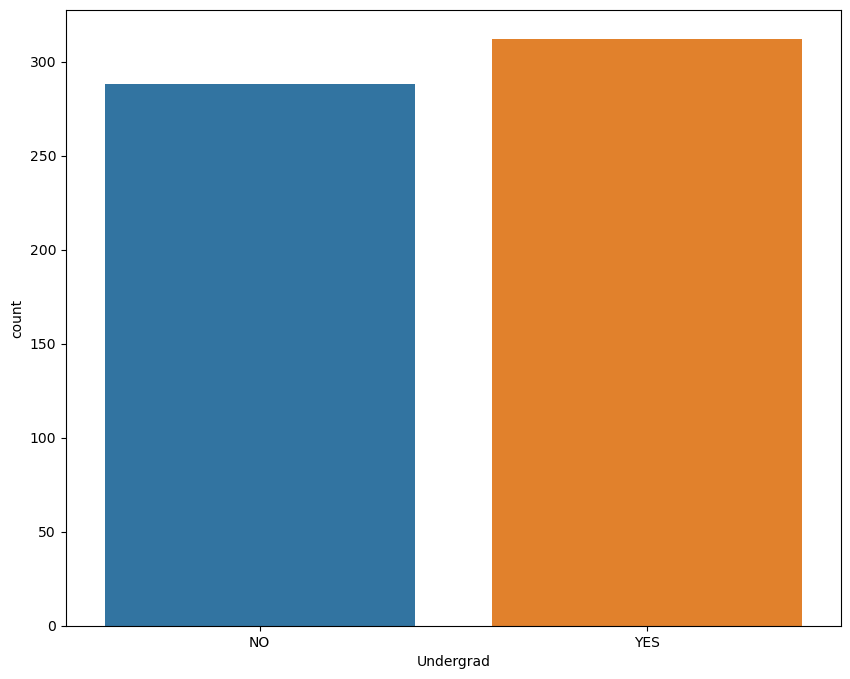

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x=fraud_data['Undergrad'])
plt.show()

In [13]:
fraud_data['Undergrad'] = pd.get_dummies(fraud_data['Undergrad'],drop_first=True)
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,1,50047,10,YES
1,1,Divorced,1,134075,18,YES
2,0,Married,1,160205,30,YES


+ For feature 'Maritial.Status'

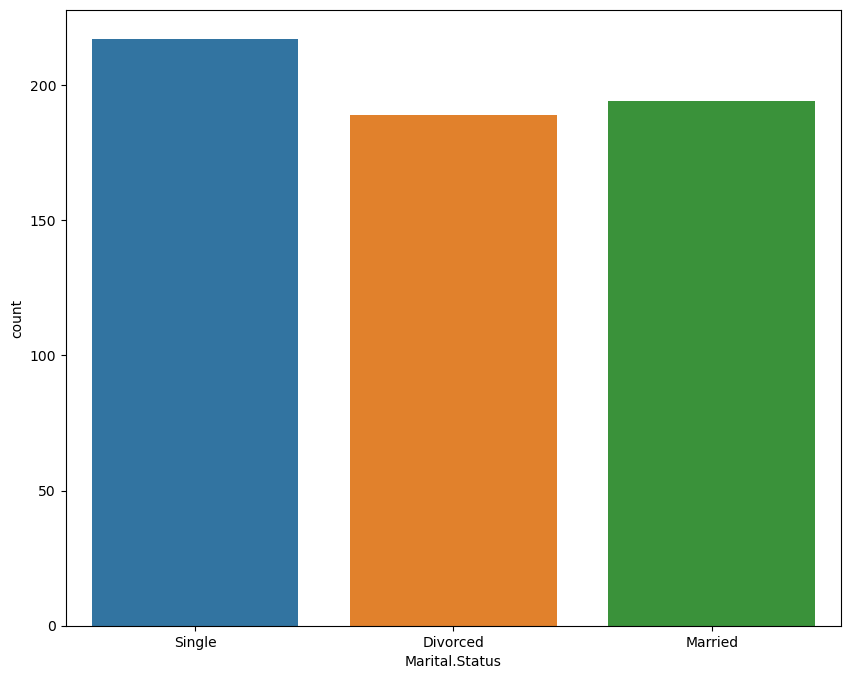

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x=fraud_data['Marital.Status'])
plt.show()

In [15]:
pd.get_dummies(fraud_data['Marital.Status'],drop_first=True)

,Married,Single
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
595,0,0
596,0,0
597,0,0
598,1,0


In [16]:
fraud_data[['Married','Single']] = pd.get_dummies(fraud_data['Marital.Status'],drop_first=True)
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,Single,1,50047,10,YES,0,1
1,1,Divorced,1,134075,18,YES,0,0
2,0,Married,1,160205,30,YES,1,0


+ For Feature 'Urban' 

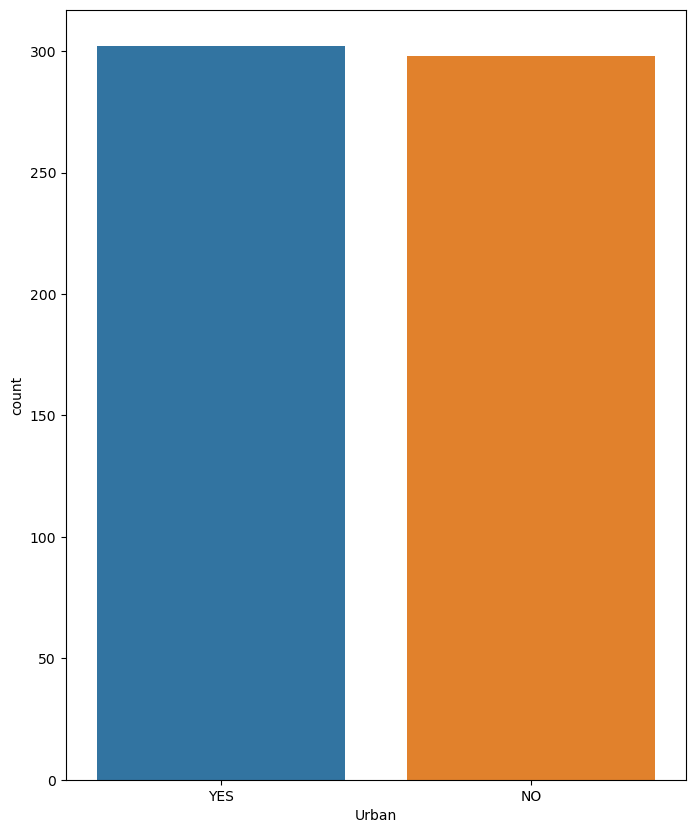

In [17]:
plt.figure(figsize=(8,10))
sns.countplot(x=fraud_data['Urban'])
plt.show()

In [18]:
pd.get_dummies(fraud_data['Urban'],drop_first=True)

,YES
0,1
1,1
2,1
3,1
4,0
...,...
595,1
596,1
597,1
598,0


In [19]:
fraud_data['Urban'] = pd.get_dummies(fraud_data['Urban'],drop_first=True)
fraud_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,Single,1,50047,10,1,0,1
1,1,Divorced,1,134075,18,1,0,0
2,0,Married,1,160205,30,1,1,0


+ Dropping the 'Maritial.Status' Feature

In [20]:
fraud_data.drop('Marital.Status',axis=1,inplace=True)

In [21]:
fraud_data.head(3)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Married,Single
0,0,1,50047,10,1,0,1
1,1,1,134075,18,1,0,0
2,0,1,160205,30,1,1,0


## Oversamplind the Data to have uniform distribution of both the Labels, as well seperation into Dependent and Independent Variables 

In [22]:
# we will over sample the data due to imbalance in data set
from imblearn.over_sampling import RandomOverSampler

In [23]:
y = fraud_data.iloc[:,1]
y.head(3)

0    1
1    1
2    1
Name: Taxable.Income, dtype: uint8

In [24]:
x = fraud_data[fraud_data.columns.difference(['Taxable.Income'])] 
x.head(3)

,City.Population,Married,Single,Undergrad,Urban,Work.Experience
0,50047,0,1,0,1,10
1,134075,0,0,1,1,18
2,160205,1,0,0,1,30


In [25]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x, y)

In [26]:
X_resampled.shape

(952, 6)

In [27]:
y_resampled.shape

(952,)

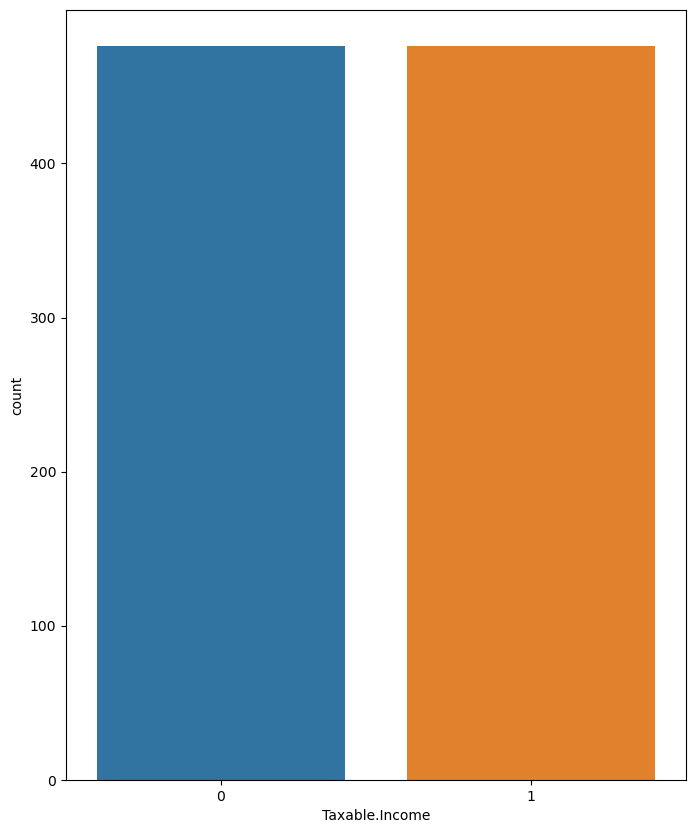

In [28]:
plt.figure(figsize=(8,10))
sns.countplot(x=y_resampled)
plt.show()

##### It can be seen that previously our data had 600 rows with 124 labeled as 'Risky' and 476 labeled as 'Good'
### Now we have a total 952 data points due to the oversampling Proper balance in the data can be observed from above plot

## Spliting the data in Training and Testing part

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=42)

In [31]:
x_train.head(3)

,City.Population,Married,Single,Undergrad,Urban,Work.Experience
316,70323,1,0,0,0,25
695,197841,1,0,0,0,7
212,112659,0,0,1,0,14


In [32]:
x_test.head(3)

,City.Population,Married,Single,Undergrad,Urban,Work.Experience
199,145744,1,0,1,1,9
420,84473,0,0,0,0,2
694,64070,1,0,0,1,2


In [33]:
y_train.head(3)

316    1
695    0
212    1
Name: Taxable.Income, dtype: uint8

In [34]:
y_test.head(3)

199    0
420    1
694    0
Name: Taxable.Income, dtype: uint8

## Model building, traininng the model 

+ 'Ginni' Criteria

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25,random_state=42) 
## Best possible number of decision tree w.r.t test data accuracy

In [36]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [37]:
test_pred_ginni = rfc.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
accuracy_score(y_test,test_pred_ginni)

0.8671328671328671

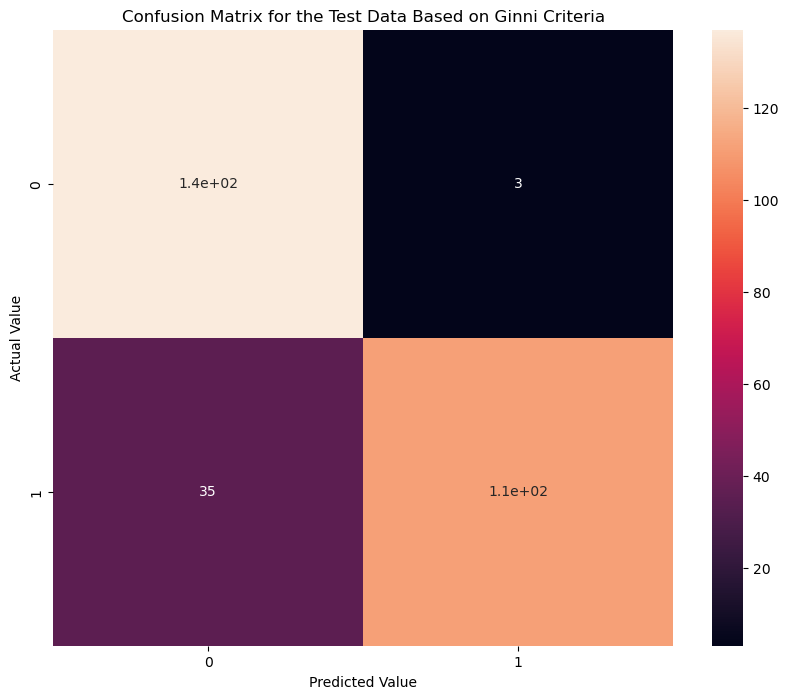

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,test_pred_ginni),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix for the Test Data Based on Ginni Criteria")
plt.show()

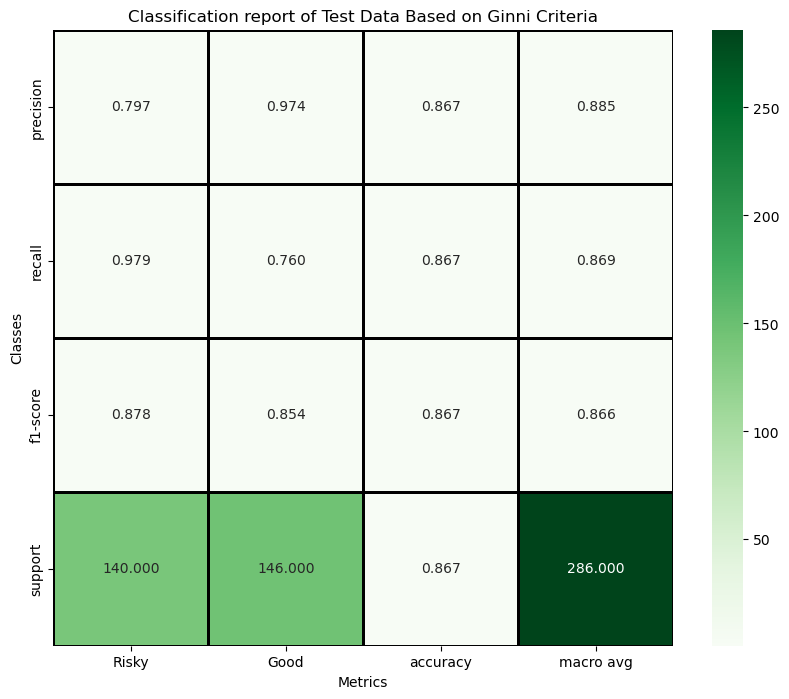

In [41]:
report = classification_report(y_test, test_pred_ginni, target_names=['Risky','Good'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
# report_df
plt.figure(figsize=(10,8))
sns.heatmap(report_df.iloc[:-1,:].T,annot=True,cmap='Greens',fmt='.3f',linewidths=1,linecolor='black')
plt.title("Classification report of Test Data Based on Ginni Criteria")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

+ Based Information Gain('Entropy')

In [42]:
rtc_ent = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42) 
## Best possible number of Decision Trees decided based on accuracy of the test data

In [43]:
rtc_ent.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [44]:
y_pred_ent = rtc_ent.predict(x_test)

In [45]:
accuracy_score(y_pred_ent,y_test)

0.8356643356643356

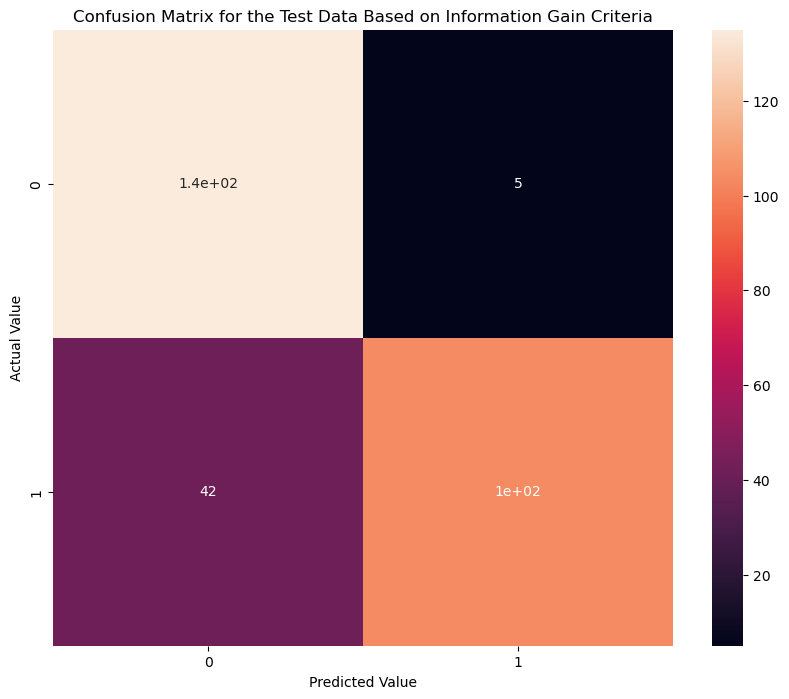

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred_ent),annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix for the Test Data Based on Information Gain Criteria")
plt.show()

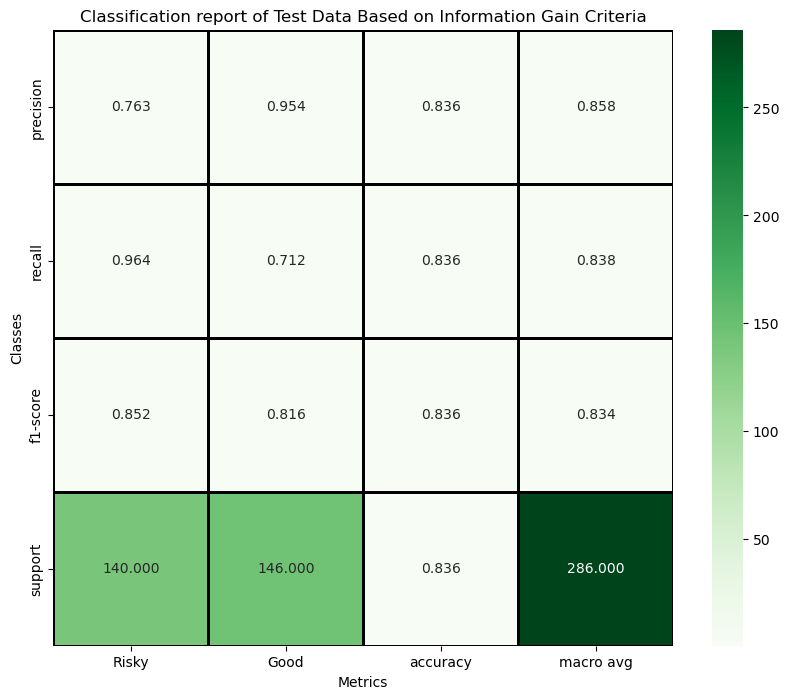

In [47]:
report = classification_report(y_test,y_pred_ent, target_names=['Risky','Good'], output_dict=True)
report_df = pd.DataFrame(report).transpose()
# report_df
plt.figure(figsize=(10,8))
sns.heatmap(report_df.iloc[:-1,:].T,annot=True,cmap='Greens',fmt='.3f',linewidths=1,linecolor='black')
plt.title("Classification report of Test Data Based on Information Gain Criteria")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

## The accuracy for the Test Data is higher in case of "Ginni" Criteria further "Ginni" Criteria also has better F1-score